# Distance to public transport analysis

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import geopandas as gpd
import folium

import matplotlib.pyplot as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgaregurrola/Repos/observatorio-ciudades/accesibilidad-urbana/aup/data.py:24: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(


## Test split function

In [2]:
gdf_line = gpd.read_file('../../../data/external/transporte/zmm_tp_rutas.gpkg')
print(gdf_line.shape)
gdf_line.head(3)

(185, 10)


,fid,Name,altitudeMo,tessellate,extrude,visibility,sistema,nombre,layer,geometry
0,1,RUTA 340 PALMIRAS - CLINICA 17,clampToGround,1.0,0.0,-1.0,Ruta,None,zmm_tp_rutaspimus,MULTILINESTRING Z ((-100.42520 25.84269 0.0000...
1,2,RUTA 070 SECTOR 2 VIVIENDA POPULAR,clampToGround,1.0,0.0,-1.0,Ruta,None,zmm_tp_rutaspimus,MULTILINESTRING Z ((-100.23444 25.66089 0.0000...
2,3,RUTA 111 SECTOR 2 COLINAS DEL AEROPUERTO - CEN...,clampToGround,1.0,0.0,-1.0,Ruta,None,zmm_tp_rutaspimus,MULTILINESTRING Z ((-100.10483 25.82346 0.0000...


In [3]:
gdf_line = gdf_line.explode()
gdf_line

/tmp/ipykernel_58317/2252090428.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  gdf_line = gdf_line.explode()


,,fid,Name,altitudeMo,tessellate,extrude,visibility,sistema,nombre,layer,geometry
0,0,1,RUTA 340 PALMIRAS - CLINICA 17,clampToGround,1.0,0.0,-1.0,Ruta,None,zmm_tp_rutaspimus,"LINESTRING Z (-100.42520 25.84269 0.00000, -10..."
1,0,2,RUTA 070 SECTOR 2 VIVIENDA POPULAR,clampToGround,1.0,0.0,-1.0,Ruta,None,zmm_tp_rutaspimus,"LINESTRING Z (-100.23444 25.66089 0.00000, -10..."
2,0,3,RUTA 111 SECTOR 2 COLINAS DEL AEROPUERTO - CEN...,clampToGround,1.0,0.0,-1.0,Ruta,None,zmm_tp_rutaspimus,"LINESTRING Z (-100.10483 25.82346 0.00000, -10..."
3,0,4,RUTA 318 NEXXUS - PILARES POR CARR. A LAREDO,clampToGround,1.0,0.0,-1.0,Ruta,None,zmm_tp_rutaspimus,"LINESTRING Z (-100.24192 25.91912 0.00000, -10..."
4,0,5,RUTA 208 SECTOR 1 ESCOBEDO - SAN RAFAEL,clampToGround,1.0,0.0,-1.0,Ruta,None,zmm_tp_rutaspimus,"LINESTRING Z (-100.37225 25.77040 0.00000, -10..."
...,...,...,...,...,...,...,...,...,...,...,...
180,0,28,None,None,NaN,NaN,NaN,Transmetro,Hospital Metropolitano - Diego Díaz de Berlanga,zmm_tp_transmetro,"LINESTRING Z (-100.28091 25.72036 0.00000, -10..."
181,0,29,None,None,NaN,NaN,NaN,Transmetro,Hospital Metropolitano - Los Pinos,zmm_tp_transmetro,"LINESTRING Z (-100.27756 25.71104 0.00000, -10..."
182,0,30,None,None,NaN,NaN,NaN,Transmetro,Hospital Metropolitano - Casa Blanca,zmm_tp_transmetro,"LINESTRING Z (-100.27755 25.71103 0.00000, -10..."
183,0,31,None,None,NaN,NaN,NaN,Transmetro,Mitras - Villas de San Francisco,zmm_tp_transmetro,"LINESTRING Z (-100.34412 25.69184 0.00000, -10..."


In [4]:
gdf_line['geometry'] = shapely.force_2d(gdf_line['geometry'])

NameError: name 'shapely' is not defined

In [ ]:
gdf_line = gdf_line.to_crs("EPSG:6372")

In [ ]:
gdf_line.head(2)

In [ ]:
gdf_line = gdf_line.reset_index(drop=True)

In [ ]:
import shapely

In [ ]:
shapely.segmentize(gdf_line.geometry, max_segment_length=100)

In [ ]:
distances = np.arange(0, 
                      gdf_line.iloc[0].geometry.length, 400)

In [ ]:
distances

In [ ]:
gdf_line.iloc[0].geometry.coords

In [ ]:
from shapely import MultiPoint
MultiPoint([gdf_line.iloc[0].geometry.interpolate(distance) for distance in distances] + [gdf_line.iloc[0].geometry.boundary[1]])

In [ ]:
gdf_line.iloc[0].geometry.xy[1][1]

In [ ]:
gdf_line.iloc[0].geometry.boundary.explode()

In [ ]:
 MultiPoint([line.interpolate(distance) for distance in distances] + [line.boundary[1]])

## Distance to public transport

### Municipality data

In [4]:
cities = ['Guadalajara', 'Monterrey', 'CDMX']

In [9]:
schema = 'hexgrid'
table = 'hexgrid_8_city_2020'
query = f"SELECT * FROM {schema}.{table} WHERE \"city\" = \'{cities[2]}\'"
hex_polygon = aup.gdf_from_query(query)

### Network data

In [10]:
G,nodes,edges = aup.graph_from_hippo(hex_polygon, schema='osmnx', edges_folder='edges_speed', nodes_folder='nodes')

<AxesSubplot: >

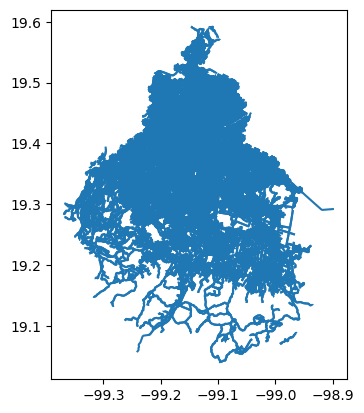

In [11]:
edges.plot()

### Public transport stops

In [12]:
paradas_gdf = gpd.read_file('../../../data/external/transporte/cdmx_tp_paradas.gpkg')
print(paradas_gdf.shape)
paradas_gdf.head(2)

(8957, 17)


,fid,SISTEMA,CORREDOR,NOMEN_CORR,ORIG_DEST,NOMEN_OD,RUTA,UBICACION,NOMENCL,stop_id,stop_name,stop_lat,stop_lon,zone_id,wheelchair_boarding,layer,geometry
0,1,CORREDORES CONCESIONADOS,CONGESA,20.0,Juanacatlan - Metro la Raza linea 3,None,Circuito Interior - Metro Chapultepec,None,None,None,None,NaN,NaN,None,NaN,CConcesionado_Paradas,POINT Z (-99.17733 19.41943 2231.63000)
1,2,CORREDORES CONCESIONADOS,CONGESA,20.0,Juanacatlan - Metro la Raza linea 3,None,Circuito Interior - Río Duero,None,None,None,None,NaN,NaN,None,NaN,CConcesionado_Paradas,POINT Z (-99.17429 19.42838 2225.55000)


## Time analysis

In [13]:
nodes_tp = aup.pois_time(G, nodes, edges, paradas_gdf, 'tp', 'time_min', count_pois=(True, 15))

Found and assigned nearest node osmid to each tp.
Starting time analysis for tp.
Starting range k = 1 of 45 for tp.
Starting range k = 2 of 45 for tp.
Starting range k = 3 of 45 for tp.
Starting range k = 4 of 45 for tp.
Starting range k = 5 of 45 for tp.
Starting range k = 6 of 45 for tp.
Starting range k = 7 of 45 for tp.
Starting range k = 8 of 45 for tp.
Starting range k = 9 of 45 for tp.
Starting range k = 10 of 45 for tp.
Starting range k = 11 of 45 for tp.
Starting range k = 12 of 45 for tp.
Starting range k = 13 of 45 for tp.
Starting range k = 14 of 45 for tp.
Starting range k = 15 of 45 for tp.
Starting range k = 16 of 45 for tp.
Starting range k = 17 of 45 for tp.
Starting range k = 18 of 45 for tp.
Starting range k = 19 of 45 for tp.
Starting range k = 20 of 45 for tp.
Starting range k = 21 of 45 for tp.
Starting range k = 22 of 45 for tp.
Starting range k = 23 of 45 for tp.
Starting range k = 24 of 45 for tp.
Starting range k = 25 of 45 for tp.
Starting range k = 26 of 45 

In [14]:
nodes_tp.to_file('../../../data/external/transporte/nodes_tp_cdmx.geojson')

## Proximity to public transport analysis by hexagon

In [54]:
df_all = pd.DataFrame()

### Read and download data

Transport nodes

In [88]:
city = cities[2]
city

'CDMX'

In [89]:
nodes_tp = gpd.read_file('../../../data/external/transporte/nodes_tp_cdmx.geojson')
print(nodes_tp.shape)
nodes_tp.head(2)

(190824, 6)


,osmid,time_tp,tp_15min,x,y,geometry
0,30339493,0.337815,58.0,-99.134103,19.418057,POINT (-99.13410 19.41806)
1,30339495,2.442885,65.0,-99.135329,19.410274,POINT (-99.13533 19.41027)


Hexagons

In [90]:
schema = 'hexgrid'
table = 'hexgrid_8_city_2020'
query = f"SELECT * FROM {schema}.{table} WHERE \"city\" = \'{city}\'"
hex_mun = aup.gdf_from_query(query)
print(hex_mun.shape)
hex_mun.head(2)

(1767, 6)


,hex_id_8,geometry,CVEGEO,NOMGEO,city,type
0,884995b889fffff,"POLYGON ((-99.18300 19.49493, -99.17848 19.497...",09002,Azcapotzalco,CDMX,urban
1,884995b8d1fffff,"POLYGON ((-99.20183 19.49350, -99.19730 19.496...",09002,Azcapotzalco,CDMX,urban


Censo

In [91]:
gdf = hex_mun.to_crs("EPSG:6372")
gdf = gdf.buffer(1).reset_index().rename(columns={0: "geometry"})
gdf = gdf.set_geometry("geometry")
gdf = gdf.to_crs("EPSG:4326")
poly_wkt = gdf.dissolve().geometry.to_wkt()[0]

In [92]:
schema = 'censo'
table = 'censo_mza_centroid_2020'
query = f"SELECT * FROM {schema}.{table} WHERE ST_Intersects(geometry, 'SRID=4326;{poly_wkt}')"
censo_cnt = aup.gdf_from_query(query, geometry_col="geometry")
print(censo_cnt.shape)
censo_cnt.head(4)

(66559, 225)


,cvegeo,geometry,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,...,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sinltc,vph_sincint,vph_sintic,metropolis
0,0900500010309001,POINT (-99.14573 19.52433),3,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,ZMVM
1,0900200011042049,POINT (-99.20754 19.47537),9,5,4,None,None,None,7,4,...,None,None,None,0,0,0,None,None,0,ZMVM
2,0900500010826005,POINT (-99.09148 19.50420),17,10,7,None,None,0,16,9,...,6,3,3,3,0,0,None,None,0,ZMVM
3,0900200011042048,POINT (-99.20757 19.47528),11,6,5,None,0,None,10,6,...,3,None,0,0,None,0,0,None,0,ZMVM


In [93]:
censo_cnt = censo_cnt[['pobtot','vivtot','geometry']]
censo_hex = censo_cnt.overlay(hex_mun, how='intersection')
censo_hex = censo_hex.groupby('hex_id_8').sum(numeric_only=True)
censo_hex = censo_hex.reset_index()
hex_pob = hex_mun.merge(censo_hex, on='hex_id_8', how='left')

In [94]:
hex_pob.head(2)

,hex_id_8,geometry,CVEGEO,NOMGEO,city,type,pobtot,vivtot
0,884995b889fffff,"POLYGON ((-99.18300 19.49493, -99.17848 19.497...",09002,Azcapotzalco,CDMX,urban,9150.0,3004.0
1,884995b8d1fffff,"POLYGON ((-99.20183 19.49350, -99.19730 19.496...",09002,Azcapotzalco,CDMX,urban,12761.0,4018.0


Nearshoring

In [95]:
schema = 'public_interest'
table = 'nearshoring_denue_23_hex'
hex_idx = list(hex_mun.hex_id_8.unique())
query = f"SELECT * FROM {schema}.{table} WHERE \"hex_id\" IN {str(tuple(hex_idx))}"
hex_near = aup.gdf_from_query(query)
print(hex_near.shape)
hex_near.head(2)

(395, 9)


,hex_id,geometry,nearshoring_industry,per_ocu_num_near_sum,denue,per_ocu_num_tot_sum,nearshoring_industry_pct,nearshoring_workforce_pct,res
0,884995b8c1fffff,"POLYGON ((-99.18192 19.47948, -99.17740 19.482...",5,161,55,879,0.090909,0.183163,8
1,884995baa1fffff,"POLYGON ((-99.18500 19.45596, -99.18047 19.458...",4,34,77,529,0.051948,0.064272,8


## Time to hexagons

In [96]:
hex_time = aup.group_by_hex_mean(nodes_tp, hex_mun, 8, 'time_tp')
print(hex_time.shape)
hex_time.head(2)

(1767, 10)


/home/edgaregurrola/Repos/observatorio-ciudades/accesibilidad-urbana/aup/analysis.py:148: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nodes_hex = nodes_in_hex.groupby([f'hex_id_{resolution}']).mean()


,hex_id_8,geometry,CVEGEO,NOMGEO,city,type,time_tp,tp_15min,x,y
0,884995b889fffff,"POLYGON ((-99.18300 19.49493, -99.17848 19.497...",09002,Azcapotzalco,CDMX,urban,3.023295,12.942308,-99.183890,19.501312
1,884995b8d1fffff,"POLYGON ((-99.20183 19.49350, -99.19730 19.496...",09002,Azcapotzalco,CDMX,urban,4.288229,10.733813,-99.202498,19.498341


<AxesSubplot: >

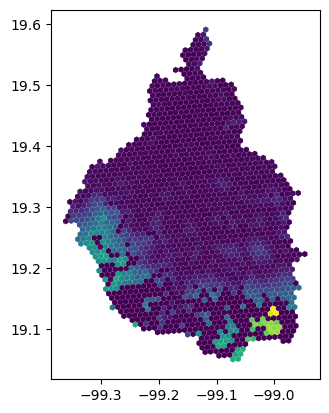

In [97]:
hex_time.plot('time_tp')

<AxesSubplot: >

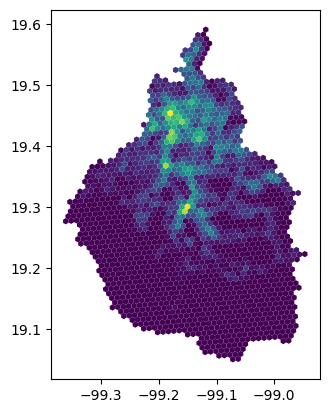

In [98]:
hex_time.plot('tp_15min')

In [99]:
hex_time.rename(columns={'hex_id_8':'hex_id'}, inplace=True)

## Merge data

In [100]:
hex_near_prox = hex_time.merge(hex_near.drop(columns=['res']), on='hex_id', how='outer')
print(hex_near_prox.shape)
hex_near_prox.head(2)

(1767, 17)


,hex_id,geometry_x,CVEGEO,NOMGEO,city,type,time_tp,tp_15min,x,y,geometry_y,nearshoring_industry,per_ocu_num_near_sum,denue,per_ocu_num_tot_sum,nearshoring_industry_pct,nearshoring_workforce_pct
0,884995b889fffff,"POLYGON ((-99.18300 19.49493, -99.17848 19.497...",09002,Azcapotzalco,CDMX,urban,3.023295,12.942308,-99.183890,19.501312,"POLYGON ((-99.18300 19.49493, -99.17848 19.497...",1.0,20.0,27.0,120.0,0.037037,0.166667
1,884995b8d1fffff,"POLYGON ((-99.20183 19.49350, -99.19730 19.496...",09002,Azcapotzalco,CDMX,urban,4.288229,10.733813,-99.202498,19.498341,"POLYGON ((-99.20183 19.49350, -99.19730 19.496...",1.0,3.0,40.0,230.0,0.025000,0.013043


In [101]:
hex_near_prox.loc[hex_near_prox.geometry_x.isnull(),'geometry_x'] = hex_near_prox['geometry_y']
hex_near_prox = hex_near_prox.rename(columns={'geometry_x':'geometry'})
hex_near_prox = hex_near_prox.drop(columns=['geometry_y'])
hex_near_prox.tail(4)

,hex_id,geometry,CVEGEO,NOMGEO,city,type,time_tp,tp_15min,x,y,nearshoring_industry,per_ocu_num_near_sum,denue,per_ocu_num_tot_sum,nearshoring_industry_pct,nearshoring_workforce_pct
1763,884995b959fffff,"POLYGON ((-99.10343 19.43883, -99.09891 19.441...",09017,Venustiano Carranza,CDMX,urban,3.467785,29.215094,-99.103915,19.443452,3.0,9.0,66.0,302.0,0.045455,0.029801
1764,884995b94dfffff,"POLYGON ((-99.07415 19.42551, -99.06963 19.428...",09017,Venustiano Carranza,CDMX,urban,10.830875,7.650000,-99.073052,19.428639,NaN,NaN,NaN,NaN,NaN,NaN
1765,884995bb33fffff,"POLYGON ((-99.10760 19.43076, -99.10307 19.433...",09017,Venustiano Carranza,CDMX,urban,3.963585,20.573585,-99.108385,19.436000,NaN,NaN,NaN,NaN,NaN,NaN
1766,884995bb3dfffff,"POLYGON ((-99.09712 19.41602, -99.09260 19.418...",09017,Venustiano Carranza,CDMX,urban,4.191746,29.042601,-99.098275,19.420503,4.0,89.0,52.0,1068.0,0.076923,0.083333


In [102]:
hex_near_prox = hex_near_prox.merge(hex_pob.drop(columns=['geometry','CVEGEO','NOMGEO','city','type']),
                                    left_on='hex_id',right_on='hex_id_8', how='outer')
print(hex_near_prox.shape)
hex_near_prox.head(2)

(1767, 19)


,hex_id,geometry,CVEGEO,NOMGEO,city,type,time_tp,tp_15min,x,y,nearshoring_industry,per_ocu_num_near_sum,denue,per_ocu_num_tot_sum,nearshoring_industry_pct,nearshoring_workforce_pct,hex_id_8,pobtot,vivtot
0,884995b889fffff,"POLYGON ((-99.18300 19.49493, -99.17848 19.497...",09002,Azcapotzalco,CDMX,urban,3.023295,12.942308,-99.183890,19.501312,1.0,20.0,27.0,120.0,0.037037,0.166667,884995b889fffff,9150.0,3004.0
1,884995b8d1fffff,"POLYGON ((-99.20183 19.49350, -99.19730 19.496...",09002,Azcapotzalco,CDMX,urban,4.288229,10.733813,-99.202498,19.498341,1.0,3.0,40.0,230.0,0.025000,0.013043,884995b8d1fffff,12761.0,4018.0


## Fill time gaps

Fill time gaps through IDW interpolation

In [103]:
hex_near_prox.city.unique()

array(['CDMX'], dtype=object)

In [104]:
hex_near_prox.city.isnull().sum()

0

Check for missing data

In [105]:
len(hex_near_prox.loc[(hex_near_prox.nearshoring_industry>=1)&
(hex_near_prox.time_tp==0)])

0

In [106]:
hex_near_prox.loc[(hex_near_prox.nearshoring_industry>=1)&
(hex_near_prox.time_tp==0)]

,hex_id,geometry,CVEGEO,NOMGEO,city,type,time_tp,tp_15min,x,y,nearshoring_industry,per_ocu_num_near_sum,denue,per_ocu_num_tot_sum,nearshoring_industry_pct,nearshoring_workforce_pct,hex_id_8,pobtot,vivtot


In [107]:
hex_near_prox.loc[(hex_near_prox.nearshoring_industry>=1),'time_tp'].min()

1.4134656812301134

## Time analysis

Weighted average

In [40]:
def weighted_average(df, weight_column, value_column):
	"""
	Weighted average function that takes a DataFrame, weight column name and value column name as inputs
	Arguments:
		df (pandas.DataFrame): DataFrame containing the data to be averaged
		weight_column (str): Column name with weight data
		value_column (str): Column name with value data
	Returns:
		weighted_average (float): Weighted average of the value column
	"""
	weighted_average = (df[weight_column] * df[value_column]).sum() / df[weight_column].sum()
	return weighted_average

Nearshoring industry

In [108]:
category_cols = ['time_tp','tp_15min']
df_res = pd.DataFrame()
row_n = 0

for city in hex_near_prox.city.unique():
    for column_analysis in category_cols:
        
        res = weighted_average(hex_near_prox.loc[(hex_near_prox.city==city)],'per_ocu_num_near_sum',column_analysis)
        df_res.loc[row_n,'near_'+column_analysis] = res
    df_res.loc[row_n,'city'] = city
    row_n += 1

Population distance

In [109]:
for city in hex_near_prox.city.unique():
    for column_analysis in category_cols:
        
        res = weighted_average(hex_near_prox.loc[(hex_near_prox.city==city)],'pobtot',column_analysis)
        df_res.loc[df_res.city==city,'pob_'+column_analysis] = res
    df_res.loc[df_res.city==city,'city'] = city
    row_n += 1

In [110]:
df_res

,near_time_tp,near_tp_15min,city,pob_time_tp,pob_tp_15min
0,5.139431,25.841158,CDMX,7.08104,18.09029


## New urbanizations

In [111]:
growth_gdf = gpd.read_file('../../../data/processed/nearshoring/urban_growth.geojson')

In [112]:
print(growth_gdf.shape)
growth_gdf.head(2)

(10235, 11)


,hex_id_8,CVEGEO,NOMGEO,city,type,20_pobtot,20_vivtot,10_pobtot,10_vivtot,nueva_urbanizacion,geometry
0,884995b889fffff,09002,Azcapotzalco,CDMX,urban,9150.0,3004.0,11473.0,3515.0,0,"POLYGON ((-99.18300 19.49493, -99.17848 19.497..."
1,884995b8d1fffff,09002,Azcapotzalco,CDMX,urban,12761.0,4018.0,12034.0,3661.0,0,"POLYGON ((-99.20183 19.49350, -99.19730 19.496..."


In [113]:
new_growth_gdf = growth_gdf.loc[growth_gdf.nueva_urbanizacion==1].copy()
print(new_growth_gdf.shape)
new_growth_gdf.head(2)

(1240, 11)


,hex_id_8,CVEGEO,NOMGEO,city,type,20_pobtot,20_vivtot,10_pobtot,10_vivtot,nueva_urbanizacion,geometry
126,884995b04bfffff,09004,Cuajimalpa de Morelos,CDMX,rural,395.0,106.0,0.0,0.0,1,"POLYGON ((-99.31540 19.36063, -99.31088 19.363..."
467,88499582e9fffff,09009,Milpa Alta,CDMX,urban,43.0,26.0,0.0,0.0,1,"POLYGON ((-99.07476 19.16175, -99.07025 19.164..."


In [114]:
new_growth_gdf = new_growth_gdf.merge(hex_time, left_on='hex_id_8',
                    right_on='hex_id', how='left')
new_growth_gdf = new_growth_gdf.rename(columns={'city_x':'city'})
new_growth_gdf = new_growth_gdf.drop(columns=['city_y'])

In [115]:
for city in new_growth_gdf.city.unique():
    for column_analysis in category_cols:
        res = new_growth_gdf.loc[new_growth_gdf.city==city,column_analysis].mean()
        df_res.loc[df_res.city==city,'new_'+column_analysis] = res

In [116]:
df_res

,near_time_tp,near_tp_15min,city,pob_time_tp,pob_tp_15min,new_time_tp,new_tp_15min
0,5.139431,25.841158,CDMX,7.08104,18.09029,37.414537,1.496558


## Save data

In [117]:
df_all = pd.concat([df_all, df_res])
df_all

,near_time_tp,near_tp_15min,city,pob_time_tp,pob_tp_15min,new_time_tp,new_tp_15min
0,6.481509,18.453205,Guadalajara,6.632248,24.116992,24.060762,3.192735
0,10.827294,31.421201,Monterrey,6.765498,32.419290,18.947885,5.710876
0,5.139431,25.841158,CDMX,7.081040,18.090290,37.414537,1.496558


In [118]:
df_all.to_csv('../../../data/processed/nearshoring/proximity_tp_comparison.csv')